The following project is about analyzing the sentiments of tweets on social networking website ‘Twitter’. The dataset for this project is scraped from Twitter. It contains 1,600,000 tweets extracted using Twitter API. It is a labeled dataset with tweets annotated with the sentiment (0 = negative, 2 = neutral, 4 = positive). It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet .

date: The date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query. If there is no query, then this value is NO_QUERY.

user: The user that tweeted

text: The text of the tweet.

Design a classification model that correctly predicts the polarity of the 
tweets provided in the dataset.

In [2]:
import pandas as pd
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv("/content/twitter_new.csv", encoding = DATASET_ENCODING)
df.columns = ["Target", "ID", "Date", "Flag", "User", "Text"]
df

,Target,ID,Date,Flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
df.shape

(1599999, 6)

In [4]:
df["Target"].unique()

array([0, 4])

In [5]:
# Count Target Class

C0 = 0
C2 = 0
C4 = 0

for i in df["Target"]:
    if i==0:
        C0=C0+1
    if i==2:
        C2=C2+1
    if i==4:
        C4=C4+1
        
print("Class 0: ", C0)
print("Class 2: ", C2)
print("Class 4: ", C4)

Class 0:  799999
Class 2:  0
Class 4:  800000


We will not be considering the neutral class as there is no instances found.

Hence the target now will be class 0 and class 4 which is a binary classification problem.

#### **Pre-Processing**

In [6]:
import re
df["Text_processed"] = df["Text"].str.replace("[^a-zA-Z0-9]", " ")
df["Text_processed"]

<ipython-input-6-11f8ec212304>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Text_processed"] = df["Text"].str.replace("[^a-zA-Z0-9]", " ")


0          is upset that he can t update his Facebook by ...
1           Kenichan I dived many times for the ball  Man...
2            my whole body feels itchy and like its on fire 
3           nationwideclass no  it s not behaving at all ...
4                               Kwesidei not the whole crew 
                                 ...                        
1599994    Just woke up  Having no school is the best fee...
1599995    TheWDB com   Very cool to hear old Walt interv...
1599996    Are you ready for your MoJo Makeover  Ask me f...
1599997    Happy 38th Birthday to my boo of alll time    ...
1599998    happy  charitytuesday  theNSPCC  SparksCharity...
Name: Text_processed, Length: 1599999, dtype: object

In [7]:
df = df[["Target", "ID", "Date", "Flag", "User", "Text", "Text_processed"]]
df.head(5)

,Target,ID,Date,Flag,User,Text,Text_processed
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no it s not behaving at all ...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,Kwesidei not the whole crew


In [8]:
df['Text_processed'] = [row.lower() for row in df['Text_processed']]
df.head(5)

,Target,ID,Date,Flag,User,Text,Text_processed
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can t update his facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no it s not behaving at all ...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei not the whole crew


In [9]:
df['Text_processed'] = df['Text_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df['Text_processed']

0          upset that can update his facebook texting and...
1          kenichan dived many times for the ball managed...
2                   whole body feels itchy and like its fire
3          nationwideclass not behaving all mad why here ...
4                                kwesidei not the whole crew
                                 ...                        
1599994        just woke having school the best feeling ever
1599995    thewdb com very cool hear old walt interviews ...
1599996    are you ready for your mojo makeover ask for d...
1599997    happy 38th birthday boo alll time tupac amaru ...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: Text_processed, Length: 1599999, dtype: object

####**Stopword Removal**

In [ ]:
import nltk
nltk.download('all')
nltk.download('averaged_perceptron_tagger')

In [11]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')  
add_words = ['http']


stop_words.extend(add_words)


def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['Text_processed'] = [remove_stopwords(r) for r in df['Text_processed']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df.head(5)

,Target,ID,Date,Flag,User,Text,Text_processed
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew


#### **Lemmatization**

In [13]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


lemmatizer = WordNetLemmatizer()
# POS
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
  
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
df['Text_processed'] = df['Text_processed'].apply(lambda x: lemmatize_sentence(x))

In [15]:
df1 = df.to_csv("Processed_data.csv", index= False)


In [3]:
df1 = pd.read_csv("Processed_data.csv")
df1

,Target,ID,Date,Flag,User,Text,Text_processed
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive many time ball manage save rest ...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew
...,...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feeling ever
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdb com cool hear old walt interview blip 8...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday boo alll time tupac amaru ...


#### **Tfidf-Vectorizer**

In [4]:
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = TfidfVectorizer(stop_words='english',ngram_range = (1,3),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df1['Text_processed'].values.astype('U'))
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['Target'], test_size=0.25, random_state=5)

#### **Model**

In [5]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)

MultinomialNB()

In [8]:
y_pred = MNB.predict(X_test)
y_pred

array([4, 4, 0, ..., 4, 4, 0])

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[156810  43070]
 [ 50169 149951]]
The model accuracy is 0.7669025


In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

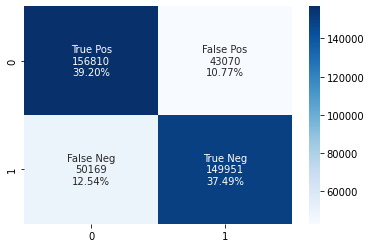

In [14]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [16]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, MNB.predict_proba(X_test)[:, 1])

0.8466784992542596

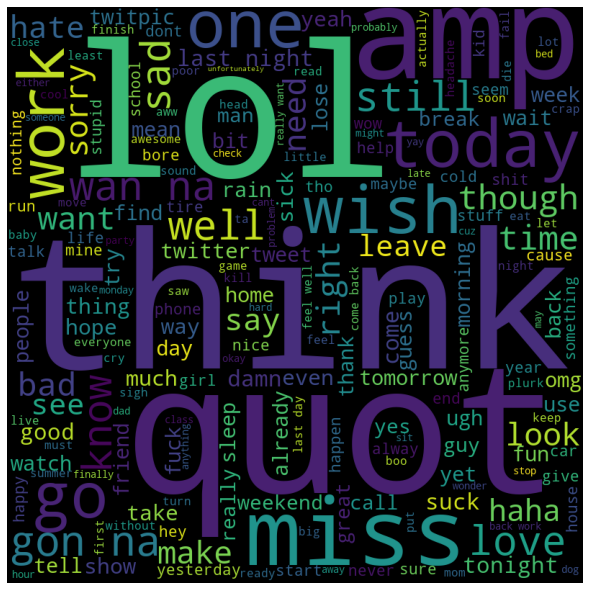

In [22]:
from wordcloud import WordCloud
word_cloud_df = df1.loc[df['Target'] == 0,:]
all_words = ' '.join(map(str, [text for text in word_cloud_df['Text_processed']]))
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()